In [1]:
#Importing the neccesary libraries and modules
import numpy as np #for numerical calculations
import pandas as pd #for making data frames
import os, sys
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split #for splitting the data set into two parts (test and train)
from sklearn.metrics import accuracy_score
import seaborn as sns #for visual representation
sns.set()#This controls the layout of the plot in terms of how it is to be read

In [2]:
#Here we are connecting to the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#takes a path to a CSV file and reads the data into a Pandas DataFrame object.
df = pd.read_csv('/content/drive/MyDrive/chronic_kidney_disease.csv')


In [4]:
#Here we are printing the dataframe
print(df)

      id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...  pcv    wc   rc  htn   dm  cad appet   pe  ane  \
0    notpresent  ...   44  7800  5.2  yes  yes   no  good   no   no   
1    

In [5]:
#using this head function returns a specific number of rows of the data(default is 5)
#we are basically printing topmost 5 rows of the data
df.head()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
df.shape

(400, 26)

In [7]:
#Here we are calculating the total number of null values in each column
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [8]:
#We are using simple Imputer to fill the missing values with the most frequent value(mode)
from sklearn.impute import SimpleImputer
imp_mode=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_imputed=pd.DataFrame(imp_mode.fit_transform(df))
df_imputed.columns=df.columns
df_imputed
#We could not use mean strategy as mean could not be calculated as data is non numeric

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [9]:
#checking again if the data frame contains missing values
df_imputed.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [10]:
#let's Check for the unique values in the data set
for i in df_imputed.columns:
  print("*****************************************************************************",i,"***********************************************************************************")
  print()
  print(set(df_imputed[i].tolist()))
  print()
#As we can see below for each column there are some special characters or unique value which may have appeared due to some error
#we will have to remove that

***************************************************************************** id ***********************************************************************************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188

In [11]:
 #Here we are basically checking the mode values of the rc,wc,pcv columns
 print(df_imputed["rc"].mode())
 print(df_imputed["wc"].mode())
 print(df_imputed["pcv"].mode())

0    5.2
Name: rc, dtype: object
0    9800
Name: wc, dtype: object
0    41
Name: pcv, dtype: object


In [12]:

#This code replace the special characters in the columns with the mode value
df_imputed["classification"]=df_imputed["classification"].apply(lambda x:'ckd' if x=='ckd\t' else x)

df_imputed["cad"]=df_imputed["cad"].apply(lambda x:'no' if x=='\tno' else x)

df_imputed["dm"]=df_imputed["dm"].apply(lambda x:'no' if x=='\tno' else x)
df_imputed["dm"]=df_imputed["dm"].apply(lambda x:'yes' if x=='\tyes' else x)
df_imputed["dm"]=df_imputed["dm"].apply(lambda x:'yes' if x=='yes' else x)

df_imputed["rc"]=df_imputed["rc"].apply(lambda x:'5.2' if x=='\t?' else x)

df_imputed["wc"]=df_imputed["wc"].apply(lambda x:'9800' if x=='\t6200' else x)
df_imputed["wc"]=df_imputed["wc"].apply(lambda x:'9800' if x=='\t8400' else x)
df_imputed["wc"]=df_imputed["wc"].apply(lambda x:'9800' if x=='\t?' else x)

df_imputed["pcv"]=df_imputed["pcv"].apply(lambda x:'41' if x=='\t43' else x)
df_imputed["pcv"]=df_imputed["pcv"].apply(lambda x:'41' if x=='\t?' else x)


In [13]:
# Now finally checking if our data set contains Unique values in the columns or not

for i in df_imputed.columns:
  print("*****************************************************************************",i,"***********************************************************************************")
  print()
  print(set(df_imputed[i].tolist()))
  print()
#As we can see the special characters are removed

***************************************************************************** id ***********************************************************************************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188

Axes(0.125,0.11;0.775x0.77)


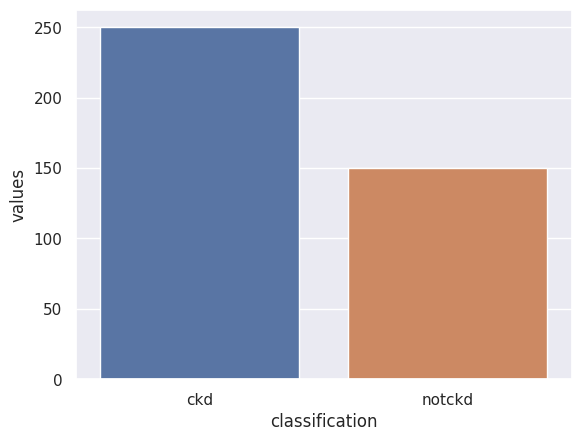

In [14]:
#checking whether the data is balanced or not
#This is basically a binary classification problem
import matplotlib.pyplot as plt
import seaborn as sns
temp=df_imputed["classification"].value_counts()
temp_df=pd.DataFrame({'classification': temp.index,'values': temp.values})
print(sns.barplot(x='classification', y="values", data=temp_df))

In [15]:
#checking for the data types of columns
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [16]:
#During imputations the data type of the columns changes to object
#as we can see below
df_imputed.dtypes

id                object
age               object
bp                object
sg                object
al                object
su                object
rbc               object
pc                object
pcc               object
ba                object
bgr               object
bu                object
sc                object
sod               object
pot               object
hemo              object
pcv               object
wc                object
rc                object
htn               object
dm                object
cad               object
appet             object
pe                object
ane               object
classification    object
dtype: object

In [17]:
# Fixing data types
for i in df.select_dtypes(exclude=["object"]).columns:
  df_imputed[i]=df_imputed[i].apply(lambda x: float(x))

In [18]:
#Here we can see we have the data types returned to original
df_imputed.dtypes

id                float64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [19]:
# Label encoding to convert categorical values to numerical
from sklearn import preprocessing

df_enco=df_imputed.apply(preprocessing.LabelEncoder().fit_transform)
df_enco

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,40,3,3,1,0,1,1,0,0,...,30,69,33,1,2,0,0,0,0,0
1,1,5,0,3,4,0,1,1,0,0,...,24,53,33,0,1,0,0,0,0,0
2,2,54,3,1,2,3,1,1,0,0,...,17,67,33,0,2,0,1,0,1,0
3,3,40,2,0,4,0,1,0,1,0,...,18,59,18,1,1,0,1,1,1,0
4,4,43,3,1,2,0,1,1,0,0,...,21,65,26,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,47,3,3,0,0,1,1,0,0,...,33,59,29,0,1,0,0,0,0,1
396,396,34,2,4,0,0,1,1,0,0,...,40,69,43,0,1,0,0,0,0,1
397,397,8,3,3,0,0,1,1,0,0,...,35,58,35,0,1,0,0,0,0,1
398,398,11,1,4,0,0,1,1,0,0,...,37,64,40,0,1,0,0,0,0,1


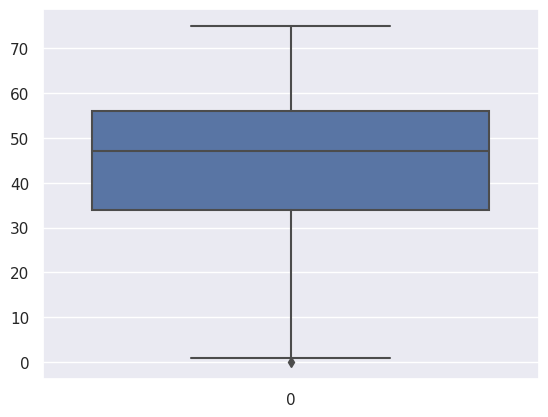

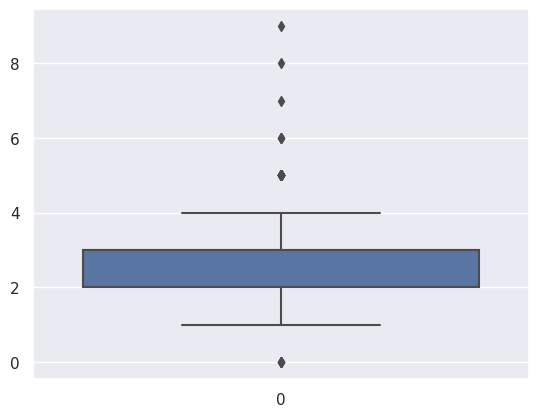

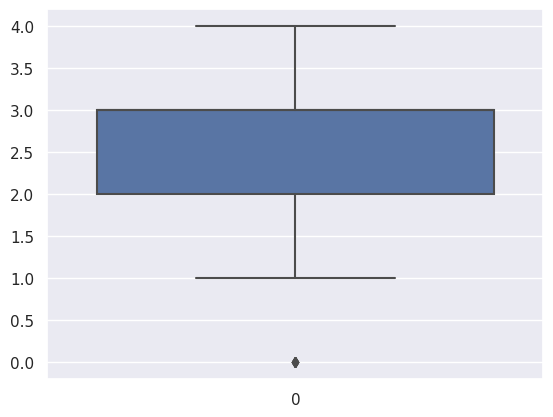

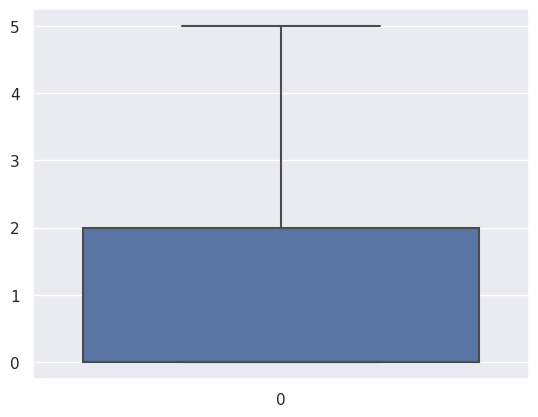

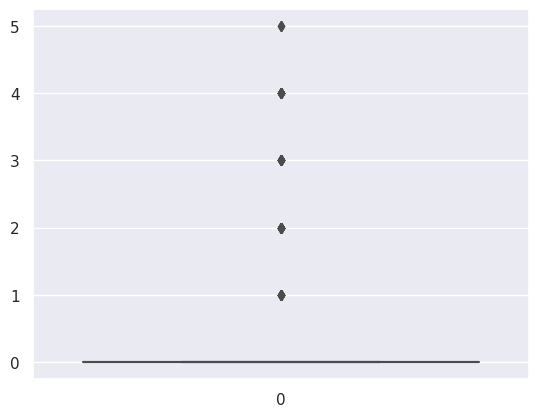

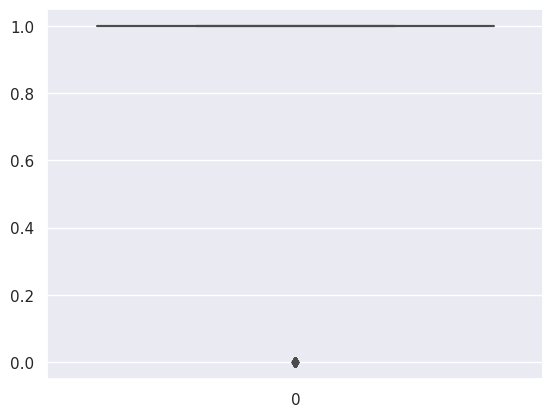

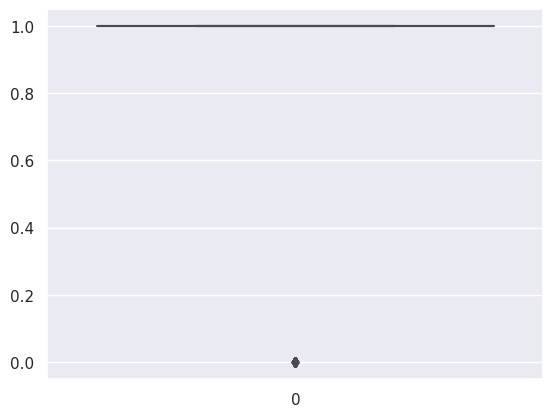

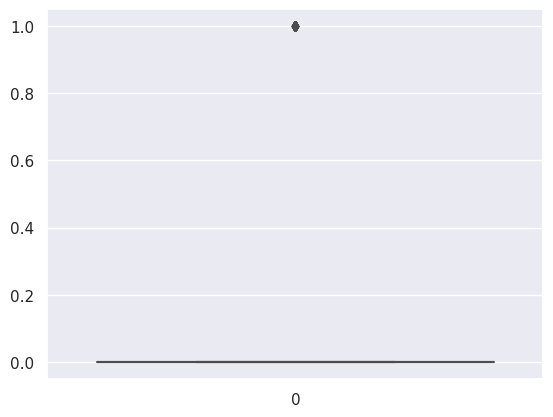

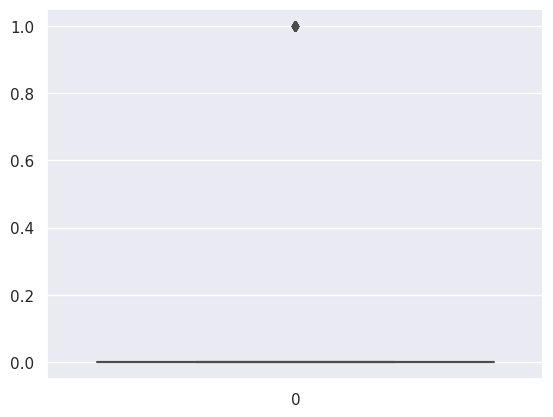

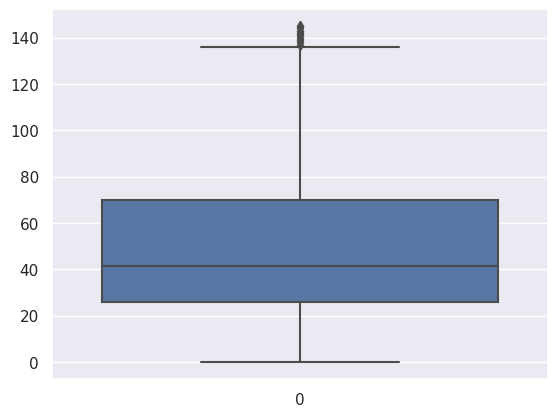

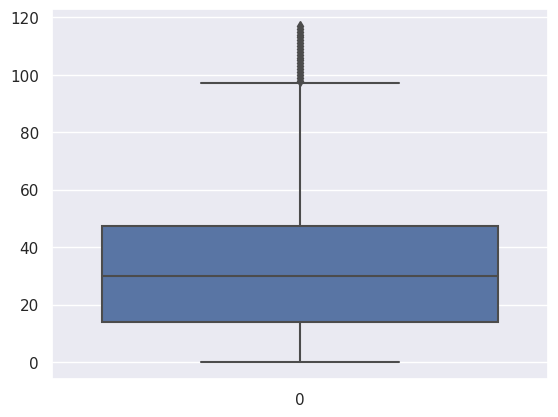

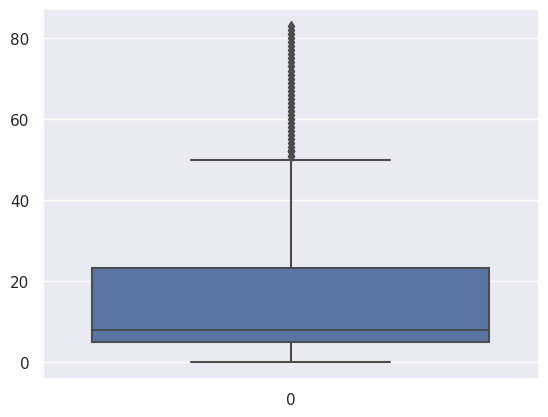

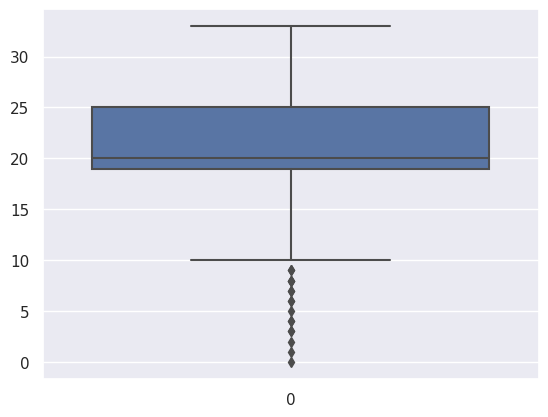

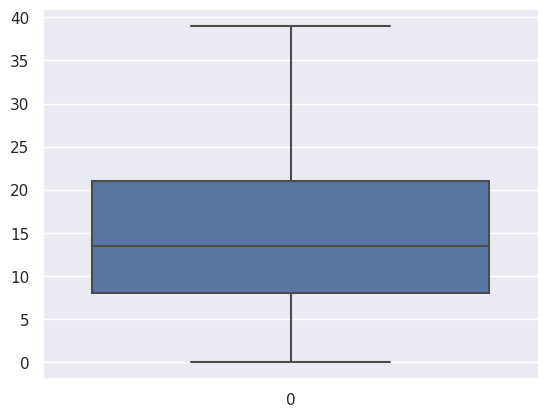

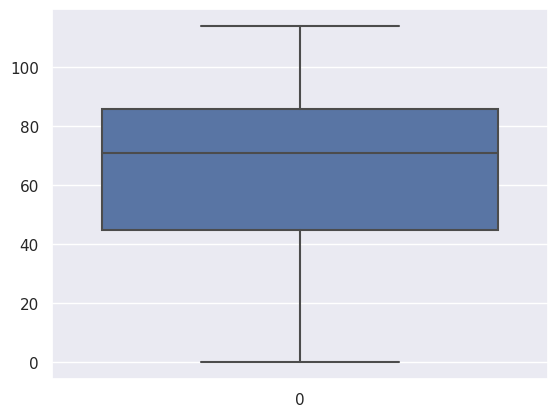

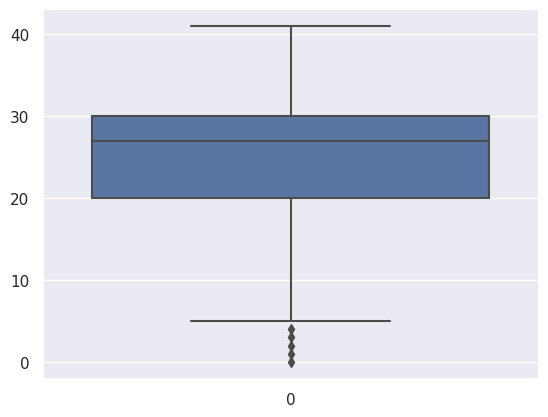

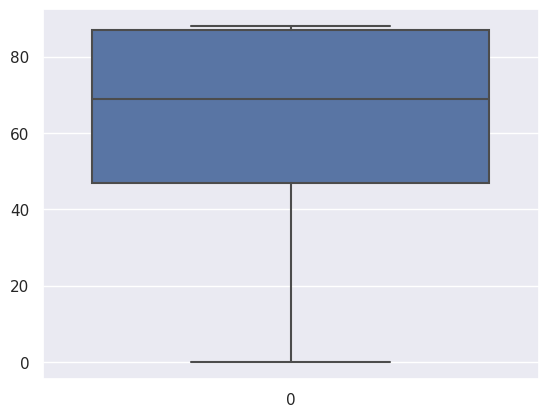

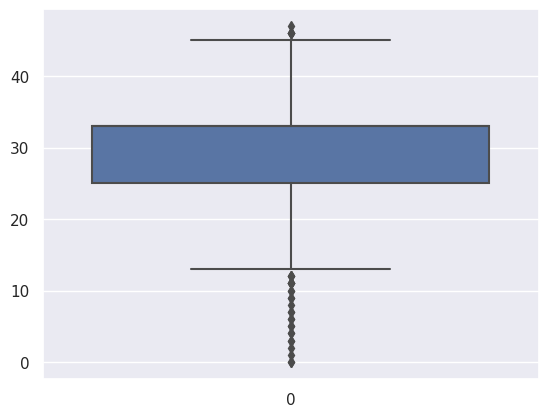

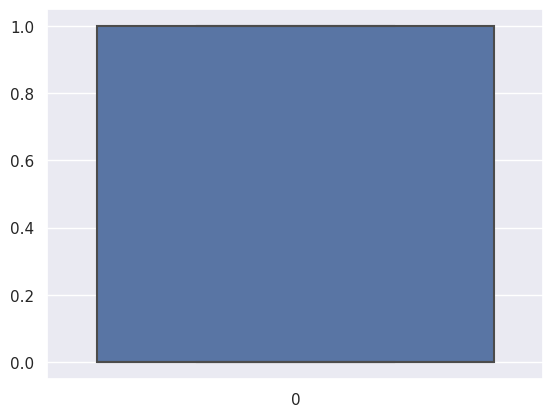

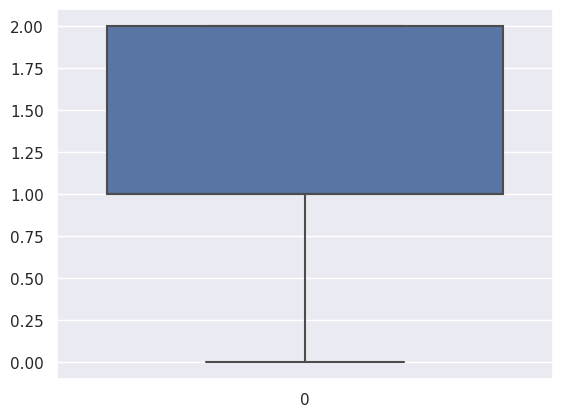

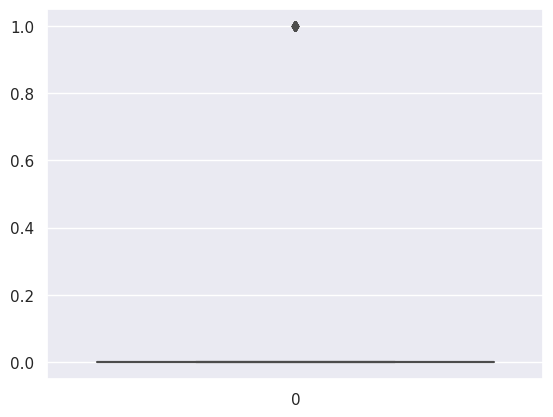

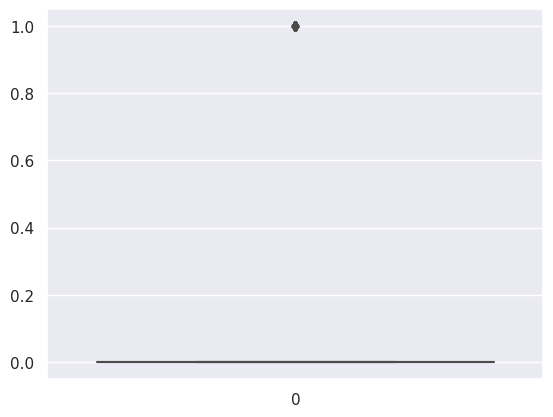

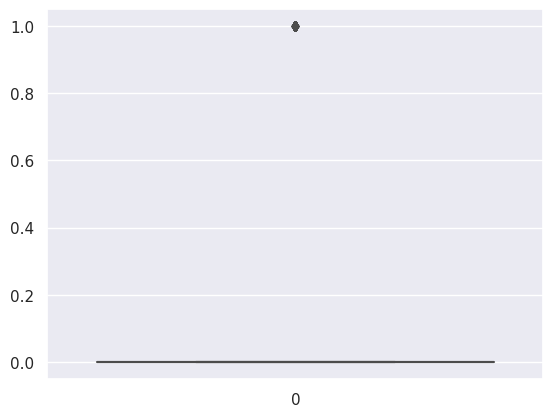

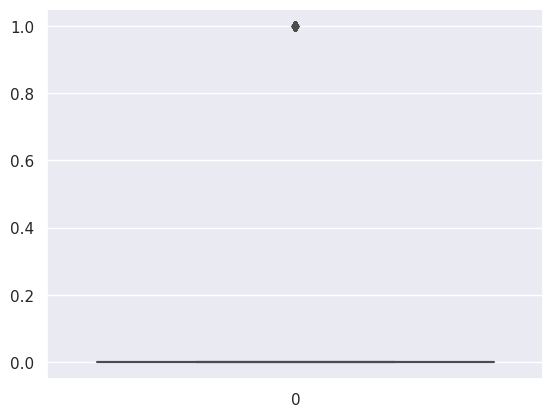

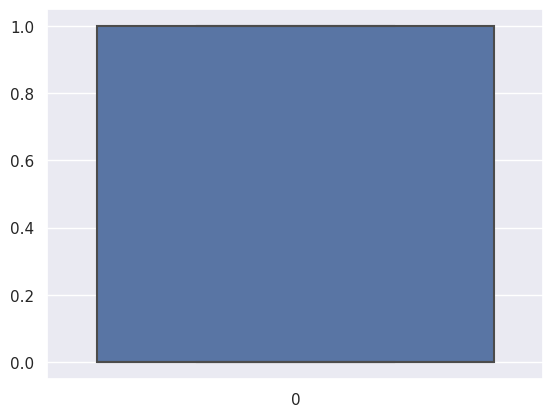

In [20]:
# Find outliers of data
  #we use boxplot function which is present in seaborn library
def boxplots(col):
   sns.boxplot(df_enco[col])
   plt.show()
for i in list(df_enco.select_dtypes(exclude=["object"]).columns)[1:]:
   boxplots(i)

In [21]:
# 'data' now contains the CKD dataset with outliers remove
columns_to_check = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']
# Calculate IQR for each column
Q1 = df_enco[columns_to_check].quantile(0.25)
Q3 = df_enco[columns_to_check].quantile(0.75)
IQR = Q3 - Q1
# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Remove outliers
cleaned_data= df_enco[~((df_enco[columns_to_check] < lower_bound) | (df_enco[columns_to_check] > upper_bound)).any(axis=1)]

# Print the number of removed outliers
num_removed_outliers = len(df_enco) - len(cleaned_data)
print(f"Number of removed outliers: {num_removed_outliers}")

Number of removed outliers: 135


<Axes: >

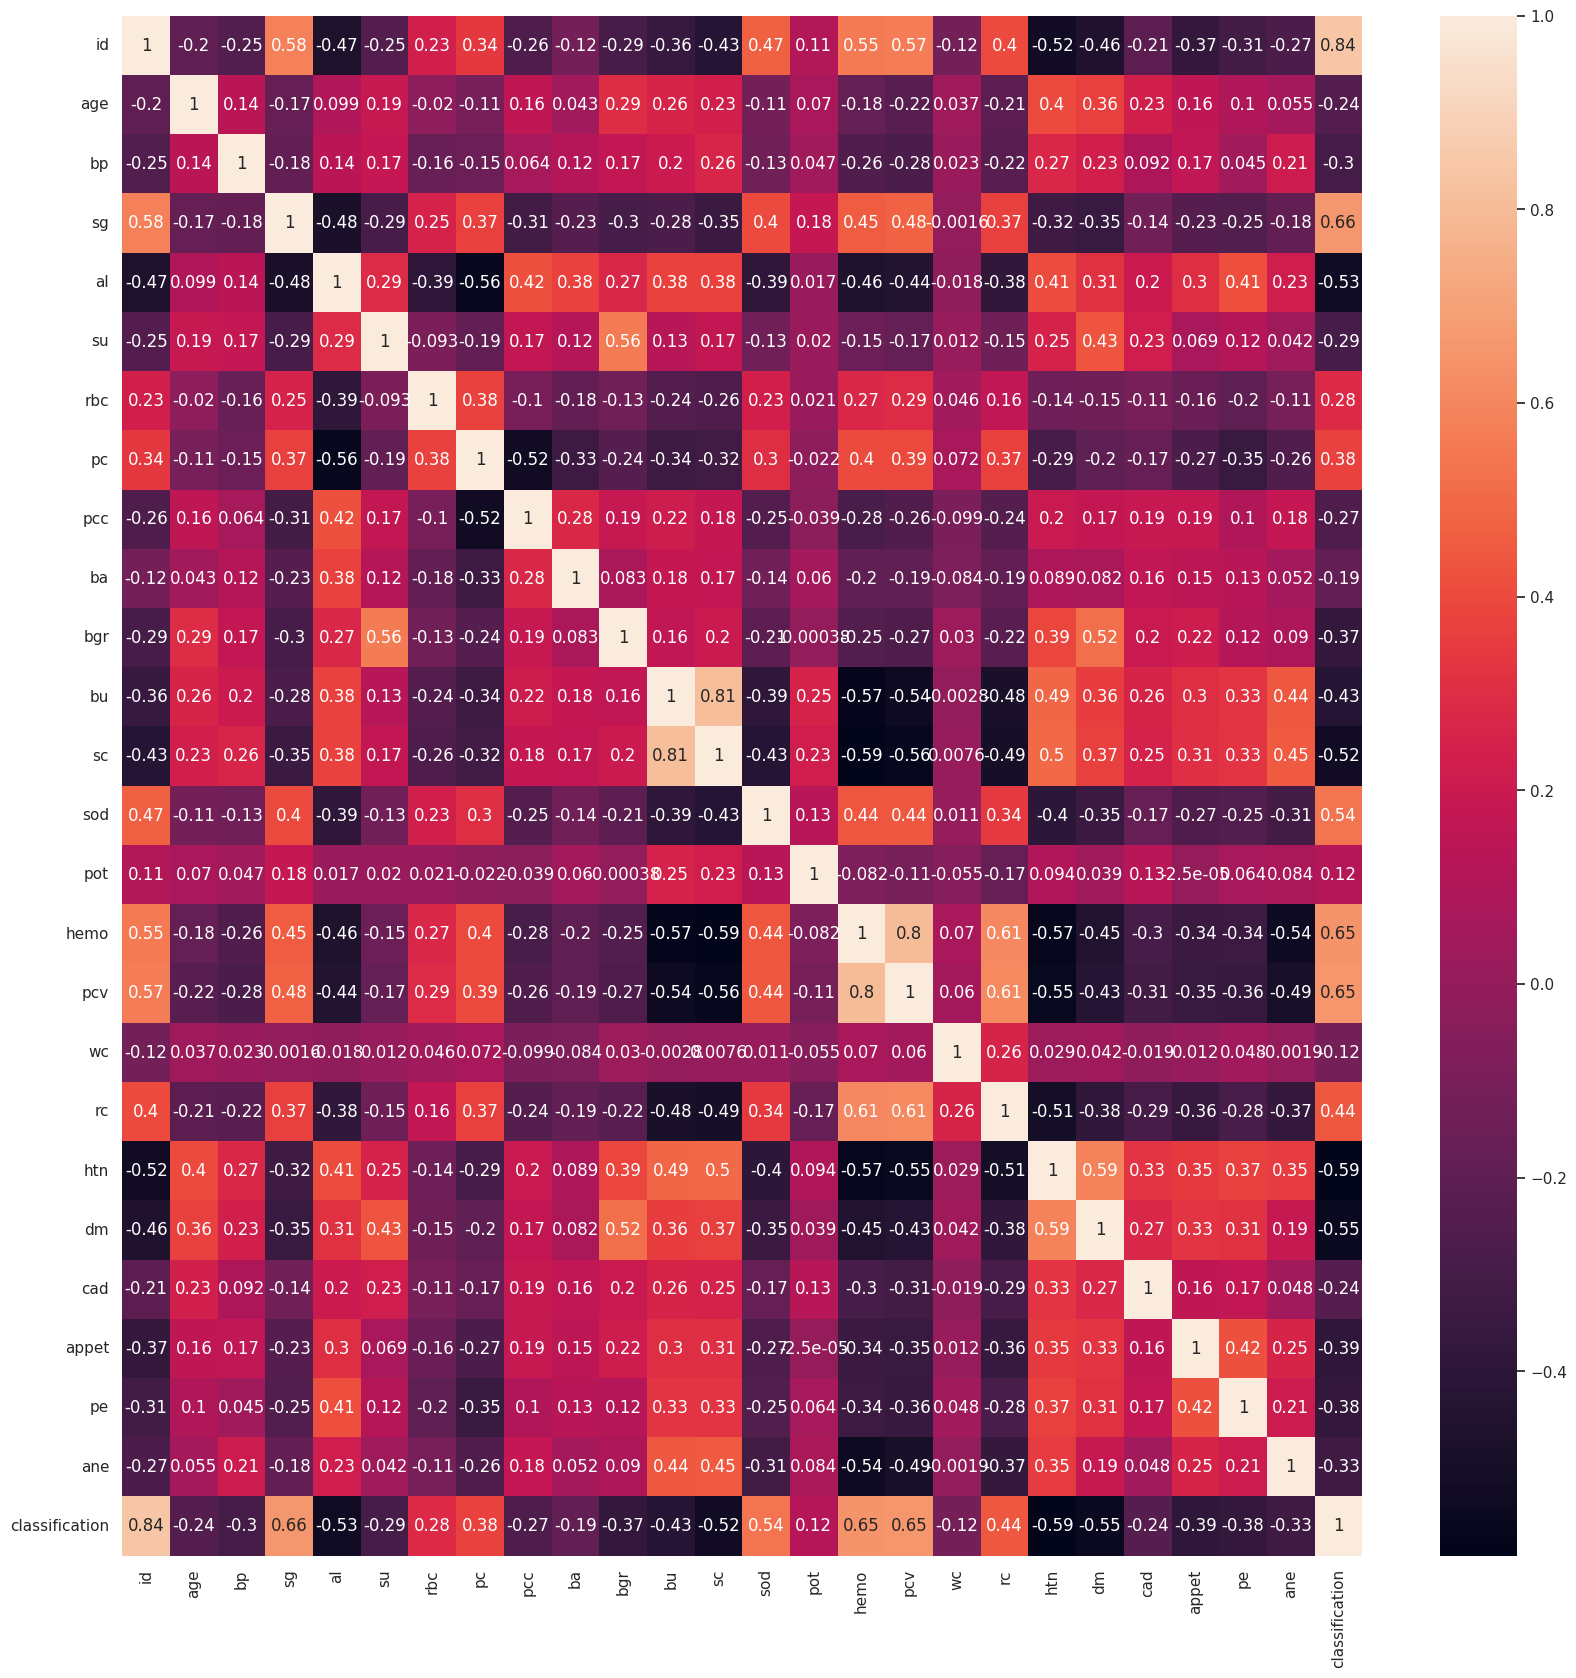

In [22]:
# Finding Correlations
#if we find highly corelated then we will apply PCA for dimensionality reduction
plt.figure(figsize=(20,20))
corr=df_enco.corr()
sns.heatmap(corr,annot=True)

In [23]:
# Lets make some final changes to the data
# seperate independent and dependent variables and drop the ID column
x=cleaned_data.drop(["id","classification"],axis=1)
y=cleaned_data["classification"]

In [24]:
#as the data set is imbalanced we will make it balanced
#Data augmentation can't be used because the data is related to medical field
#we will do data resampling
#first we will detect the label balance
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

print(Counter(y))

Counter({1: 145, 0: 120})


In [25]:
# Lets balance the labels

ros= RandomOverSampler()

X_ros, y_ros = ros.fit_resample(x,y)
print(Counter(y_ros))

Counter({0: 145, 1: 145})


In [26]:
#Now as we can see that both ckd and not ckd classes contains 145 values.

In [27]:
# scale the feature to between -1 and 1

scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(X_ros)
y=y_ros

**Without Using PCA**

In [28]:
# Now, Split the dataset in to training and tsting sets keeping 20% of the data for testing.
# Split the dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)


**Building Classification Models**

In [29]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

**Logistic regression**

In [31]:
from sklearn.linear_model import LogisticRegression
# Create and train the logistic regression model.
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set.
y_test_pred_lr= model.predict(X_test)

# Evaluate the model's performance.
accuracy = accuracy_score(y_test, y_test_pred_lr)


print(f"Accuracy: {accuracy}")


Accuracy: 0.9827586206896551


**XGBoost**

In [32]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train,y_train)
xgb_classifier.fit(X_train,y_train)
predictions = xgb_classifier.predict(X_test)
predictions


array([0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [33]:
print("Accuracy of Model::",accuracy_score(y_test,predictions))

Accuracy of Model:: 1.0


**K Nearest Neighbours**

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(3) # Define classifier
knn.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = knn.predict(X_train)
y_test_pred_knn = knn.predict(X_test)

# Training set performance
knn_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
knn_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
knn_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
knn_test_accuracy = accuracy_score(y_test, y_test_pred_knn) # Calculate Accuracy
knn_test_mcc = matthews_corrcoef(y_test, y_test_pred_knn) # Calculate MCC
knn_test_f1 = f1_score(y_test, y_test_pred_knn, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % knn_train_accuracy)
print('- MCC: %s' % knn_train_mcc)
print('- F1 score: %s' % knn_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % knn_test_accuracy)
print('- MCC: %s' % knn_test_mcc)
print('- F1 score: %s' % knn_test_f1)


Model performance for Training set
- Accuracy: 0.978448275862069
- MCC: 0.9576324540552691
- F1 score: 0.9784181189690234
----------------------------------
Model performance for Test set
- Accuracy: 0.9482758620689655
- MCC: 0.9002541398626663
- F1 score: 0.948603526291153


**Support vector Machines(Radial basis function kernel)**

In [36]:
from sklearn.svm import SVC

svm_rbf = SVC(gamma=2, C=1)
svm_rbf.fit(X_train, y_train)

# Make predictions
y_train_pred = svm_rbf.predict(X_train)
y_test_pred_svm= svm_rbf.predict(X_test)

# Training set performance
svm_rbf_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
svm_rbf_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
svm_rbf_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
svm_rbf_test_accuracy = accuracy_score(y_test, y_test_pred_svm) # Calculate Accuracy
svm_rbf_test_mcc = matthews_corrcoef(y_test, y_test_pred_svm) # Calculate MCC
svm_rbf_test_f1 = f1_score(y_test, y_test_pred_svm, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % svm_rbf_train_accuracy)
print('- MCC: %s' % svm_rbf_train_mcc)
print('- F1 score: %s' % svm_rbf_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % svm_rbf_test_accuracy)
print('- MCC: %s' % svm_rbf_test_mcc)
print('- F1 score: %s' % svm_rbf_test_f1)


Model performance for Training set
- Accuracy: 1.0
- MCC: 1.0
- F1 score: 1.0
----------------------------------
Model performance for Test set
- Accuracy: 0.9310344827586207
- MCC: 0.8583045614131399
- F1 score: 0.9305204540586849


**Decision Tree**

In [37]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5) # Define classifier
dt.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = dt.predict(X_train)
y_test_pred_dt = dt.predict(X_test)

# Training set performance
dt_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
dt_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
dt_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
dt_test_accuracy = accuracy_score(y_test, y_test_pred_dt) # Calculate Accuracy
dt_test_mcc = matthews_corrcoef(y_test, y_test_pred_dt) # Calculate MCC
dt_test_f1 = f1_score(y_test, y_test_pred_dt, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % dt_train_accuracy)
print('- MCC: %s' % dt_train_mcc)
print('- F1 score: %s' % dt_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % dt_test_accuracy)
print('- MCC: %s' % dt_test_mcc)
print('- F1 score: %s' % dt_test_f1)

Model performance for Training set
- Accuracy: 0.9913793103448276
- MCC: 0.9828858055196549
- F1 score: 0.9913818760262726
----------------------------------
Model performance for Test set
- Accuracy: 0.9827586206896551
- MCC: 0.964858736267844
- F1 score: 0.9827001392920561


**Random forest**

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10) # Define classifier
rf.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

# Training set performance
rf_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
rf_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
rf_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
rf_test_accuracy = accuracy_score(y_test, y_test_pred_rf) # Calculate Accuracy
rf_test_mcc = matthews_corrcoef(y_test, y_test_pred_rf) # Calculate MCC
rf_test_f1 = f1_score(y_test, y_test_pred_rf, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % rf_train_accuracy)
print('- MCC: %s' % rf_train_mcc)
print('- F1 score: %s' % rf_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % rf_test_accuracy)
print('- MCC: %s' % rf_test_mcc)
print('- F1 score: %s' % rf_test_f1)

Model performance for Training set
- Accuracy: 1.0
- MCC: 1.0
- F1 score: 1.0
----------------------------------
Model performance for Test set
- Accuracy: 1.0
- MCC: 1.0
- F1 score: 1.0


**Build Stacked Model**

In [39]:
# Define estimators
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimator_list = [
    ('knn',knn),
    ('svm_rbf',svm_rbf),
    ('dt',dt),
    ('rf',rf),
     ('LR',model)]
      # Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator= LogisticRegression(
    )
    )

# Train stacked model
#stack_model.fit(X_train, y_train)
stack_model.fit(X_train, y_train)

# Make predictions
y_train_pred = stack_model.predict(X_train)
y_test_pred_stacked_model = stack_model.predict(X_test)


# Training set model performance
stack_model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
stack_model_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
stack_model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set model performance
stack_model_test_accuracy = accuracy_score(y_test, y_test_pred_stacked_model) # Calculate Accuracy
stack_model_test_mcc = matthews_corrcoef(y_test, y_test_pred_stacked_model) # Calculate MCC
stack_model_test_f1 = f1_score(y_test, y_test_pred_stacked_model, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % stack_model_train_accuracy)
print('- MCC: %s' % stack_model_train_mcc)
print('- F1 score: %s' % stack_model_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % stack_model_test_accuracy)
print('- MCC: %s' % stack_model_test_mcc)
print('- F1 score: %s' % stack_model_test_f1)

Model performance for Training set
- Accuracy: 1.0
- MCC: 1.0
- F1 score: 1.0
----------------------------------
Model performance for Test set
- Accuracy: 1.0
- MCC: 1.0
- F1 score: 1.0


**Results**

In [40]:
acc_test_list = {'xgb_classifier':accuracy_score(y_test,predictions),
'knn':knn_test_accuracy,
'svm_rbf': svm_rbf_test_accuracy,
'dt': dt_test_accuracy,
'rf': rf_test_accuracy,
'LR': accuracy,
'stack': stack_model_test_accuracy}

mcc_test_list = {'xgb_classifier':matthews_corrcoef(y_test,predictions),
'knn':knn_test_mcc,
'svm_rbf': svm_rbf_test_mcc,
'dt': dt_test_mcc,
'rf': rf_test_mcc,
'LR':matthews_corrcoef(y_test, y_test_pred_lr),
'stack': stack_model_test_mcc}

f1_test_list = {'xgb_classifier':f1_score(y_test,predictions),
'knn':knn_test_f1,
'svm_rbf': svm_rbf_test_f1,
'dt': dt_test_f1,
'rf': rf_test_f1,
'LR': f1_score(y_test, y_test_pred_lr),
'stack': stack_model_test_f1}

In [41]:
acc_df = pd.DataFrame.from_dict(acc_test_list, orient='index', columns=['Accuracy'])
mcc_df = pd.DataFrame.from_dict(mcc_test_list, orient='index', columns=['MCC'])
f1_df = pd.DataFrame.from_dict(f1_test_list, orient='index', columns=['F1'])
df = pd.concat([acc_df, mcc_df, f1_df], axis=1)
df

,Accuracy,MCC,F1
xgb_classifier,1.000000,1.000000,1.000000
knn,0.948276,0.900254,0.948604
svm_rbf,0.931034,0.858305,0.930520
dt,0.982759,0.964859,0.982700
rf,1.000000,1.000000,1.000000
LR,0.982759,0.965280,0.979592
stack,1.000000,1.000000,1.000000


In [42]:
print('shape of training data set:',X_train.shape)
print('shape of test data set:',X_test.shape)

shape of training data set: (232, 24)
shape of test data set: (58, 24)


In [43]:
pred=stack_model.predict(X_test)
pred=[1 if y>=0.5 else 0 for y in pred]
pred

[0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1]

In [44]:
#Now let's Print the original and Predicted values together
print('Original : {0}' .format(", ".join(str(x) for x in y_test)))
print('Predicted: {0}' .format(", ".join(str(x) for x in pred)))

Original : 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1
Predicted: 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1


In [45]:
#Now let's Make confusion Matrix
from sklearn.metrics import confusion_matrix
# Example predicted and original values
predicted_values = [1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0]
original_values = [1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0]
# Create the confusion matrix
cm = confusion_matrix(original_values, predicted_values)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[45  1]
 [ 0 54]]


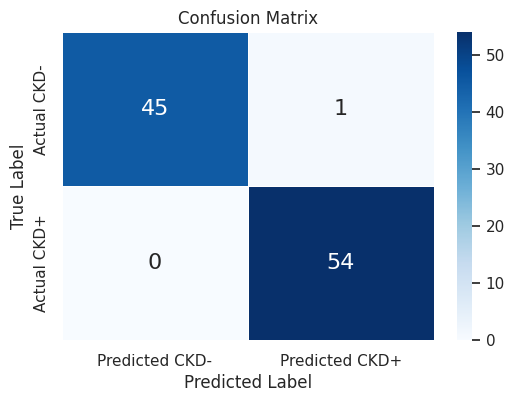

In [46]:
import matplotlib.pyplot as plt
confusion_df = pd.DataFrame(cm, index=['Actual CKD-', 'Actual CKD+'], columns=['Predicted CKD-', 'Predicted CKD+'])
# Plot the colored confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_df, annot=True, cmap='Blues', fmt='d', linewidths=0.5, annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [47]:
#As above we can see we got a 2*2 Matrix. This is because we have binary classification Problem

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
# Create a table for precision, recall, and accuracy
results_dict = {
    'Model': ['XGB','KNN','Random forest', 'Decision Tree', 'SVM', 'LR', 'Stacked Ensemble'],
    'Precision': [
        precision_score(y_test, predictions),
        precision_score(y_test, y_test_pred_knn),
        precision_score(y_test, y_test_pred_rf),
        precision_score(y_test, y_test_pred_dt),
        precision_score(y_test, y_test_pred_svm),
        precision_score(y_test, y_test_pred_lr),
        precision_score(y_test, y_test_pred_stacked_model)
    ],
    'Recall': [
        recall_score(y_test,predictions),
        recall_score(y_test, y_test_pred_knn),
        recall_score(y_test, y_test_pred_rf),
        recall_score(y_test, y_test_pred_dt),
        recall_score(y_test, y_test_pred_svm),
        recall_score(y_test, y_test_pred_lr),
        recall_score(y_test, y_test_pred_stacked_model)
    ],
    'Accuracy': [
        accuracy_score(y_test, predictions),
        accuracy_score(y_test, y_test_pred_knn),
        accuracy_score(y_test, y_test_pred_rf),
        accuracy_score(y_test, y_test_pred_dt),
        accuracy_score(y_test, y_test_pred_svm),
        accuracy_score(y_test, y_test_pred_lr),
        accuracy_score(y_test, y_test_pred_stacked_model)
    ]
}

results_df = pd.DataFrame(results_dict)

# Display the table
print(results_df)

              Model  Precision    Recall  Accuracy
0               XGB   1.000000  1.000000  1.000000
1               KNN   0.888889  1.000000  0.948276
2     Random forest   1.000000  1.000000  1.000000
3     Decision Tree   1.000000  0.958333  0.982759
4               SVM   0.954545  0.875000  0.931034
5                LR   0.960000  1.000000  0.982759
6  Stacked Ensemble   1.000000  1.000000  1.000000


**Using PCA**

In [51]:
#Using PCA
#As we can see the data is highly corelated so we can apply PCA

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.decomposition import PCA

pca=PCA(.95)
X_PCA=pca.fit_transform(x)

print(x.shape)
print(X_PCA.shape)

# Thus we need 18 columns to keep 95% of the variance

(290, 24)
(290, 18)


In [52]:
X_train, X_test, y_train, y_test=train_test_split(X_PCA, y, test_size=0.2, random_state=42)

**Build Classification Models**

In [53]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

**Logistic Regression**

In [54]:
from sklearn.linear_model import LogisticRegression
# Create and train the logistic regression model.
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set.
y_test_pred_lr_pca= model.predict(X_test)

# Evaluate the model's performance.
accuracy_pca = accuracy_score(y_test, y_test_pred_lr_pca)


print(f"Accuracy: {accuracy}")

Accuracy: 0.9827586206896551


**XGBoost**

In [55]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train,y_train)
xgb_classifier.fit(X_train,y_train)
xgb_predictions_pca = xgb_classifier.predict(X_test)
xgb_predictions_pca

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [56]:
print("Accuracy of Model::",accuracy_score(y_test,xgb_predictions_pca))

Accuracy of Model:: 1.0


**K Nearest Neighbours**

In [57]:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(3) # Define classifier
knn.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred_pca = knn.predict(X_train)
y_test_pred_knn_pca = knn.predict(X_test)

# Training set performance
knn_train_accuracy_pca = accuracy_score(y_train, y_train_pred_pca) # Calculate Accuracy
knn_train_mcc_pca = matthews_corrcoef(y_train, y_train_pred_pca) # Calculate MCC
knn_train_f1_pca = f1_score(y_train, y_train_pred_pca, average='weighted') # Calculate F1-score

# Test set performance
knn_test_accuracy_pca = accuracy_score(y_test, y_test_pred_knn_pca) # Calculate Accuracy
knn_test_mcc_pca = matthews_corrcoef(y_test, y_test_pred_knn_pca) # Calculate MCC
knn_test_f1_pca = f1_score(y_test, y_test_pred_knn_pca, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % knn_train_accuracy_pca)
print('- MCC: %s' % knn_train_mcc_pca)
print('- F1 score: %s' % knn_train_f1_pca)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % knn_test_accuracy_pca)
print('- MCC: %s' % knn_test_mcc_pca)
print('- F1 score: %s' % knn_test_f1_pca)

Model performance for Training set
- Accuracy: 0.9913793103448276
- MCC: 0.9828605166976074
- F1 score: 0.9913754560871576
----------------------------------
Model performance for Test set
- Accuracy: 0.9655172413793104
- MCC: 0.9320827648567408
- F1 score: 0.9656844305120168


**Support vector Machines(Radial basis function kernel)**

In [58]:
from sklearn.svm import SVC

svm_rbf = SVC(gamma=2, C=1)
svm_rbf.fit(X_train, y_train)

# Make predictions
y_train_pred_pca = svm_rbf.predict(X_train)
y_test_pred_svm_pca= svm_rbf.predict(X_test)

# Training set performance
svm_rbf_train_accuracy_pca = accuracy_score(y_train, y_train_pred_pca) # Calculate Accuracy
svm_rbf_train_mcc_pca = matthews_corrcoef(y_train, y_train_pred_pca) # Calculate MCC
svm_rbf_train_f1_pca = f1_score(y_train, y_train_pred_pca, average='weighted') # Calculate F1-score

# Test set performance
svm_rbf_test_accuracy_pca = accuracy_score(y_test, y_test_pred_svm_pca) # Calculate Accuracy
svm_rbf_test_mcc_pca = matthews_corrcoef(y_test, y_test_pred_svm_pca) # Calculate MCC
svm_rbf_test_f1_pca = f1_score(y_test, y_test_pred_svm_pca, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % svm_rbf_train_accuracy_pca)
print('- MCC: %s' % svm_rbf_train_mcc_pca)
print('- F1 score: %s' % svm_rbf_train_f1_pca)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % svm_rbf_test_accuracy_pca)
print('- MCC: %s' % svm_rbf_test_mcc_pca)
print('- F1 score: %s' % svm_rbf_test_f1_pca)


Model performance for Training set
- Accuracy: 1.0
- MCC: 1.0
- F1 score: 1.0
----------------------------------
Model performance for Test set
- Accuracy: 0.9482758620689655
- MCC: 0.893296323603477
- F1 score: 0.9481004178761682


**Decision Tree**

In [59]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5) # Define classifier
dt.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred_pca = dt.predict(X_train)
y_test_pred_dt_pca = dt.predict(X_test)

# Training set performance
dt_train_accuracy_pca = accuracy_score(y_train, y_train_pred_pca) # Calculate Accuracy
dt_train_mcc_pca = matthews_corrcoef(y_train, y_train_pred_pca) # Calculate MCC
dt_train_f1_pca = f1_score(y_train, y_train_pred_pca, average='weighted') # Calculate F1-score

# Test set performance
dt_test_accuracy_pca = accuracy_score(y_test, y_test_pred_dt_pca) # Calculate Accuracy
dt_test_mcc_pca = matthews_corrcoef(y_test, y_test_pred_dt_pca) # Calculate MCC
dt_test_f1_pca = f1_score(y_test, y_test_pred_dt_pca, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % dt_train_accuracy_pca)
print('- MCC: %s' % dt_train_mcc_pca)
print('- F1 score: %s' % dt_train_f1_pca)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % dt_test_accuracy_pca)
print('- MCC: %s' % dt_test_mcc_pca)
print('- F1 score: %s' % dt_test_f1_pca)

Model performance for Training set
- Accuracy: 1.0
- MCC: 1.0
- F1 score: 1.0
----------------------------------
Model performance for Test set
- Accuracy: 0.9827586206896551
- MCC: 0.9652795998478124
- F1 score: 0.9828058861218187


**Random Forest**

In [60]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10) # Define classifier
rf.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred_pca = rf.predict(X_train)
y_test_pred_rf_pca = rf.predict(X_test)

# Training set performance
rf_train_accuracy_pca = accuracy_score(y_train, y_train_pred_pca) # Calculate Accuracy
rf_train_mcc_pca = matthews_corrcoef(y_train, y_train_pred_pca) # Calculate MCC
rf_train_f1_pca = f1_score(y_train, y_train_pred_pca, average='weighted') # Calculate F1-score

# Test set performance
rf_test_accuracy_pca = accuracy_score(y_test, y_test_pred_rf_pca) # Calculate Accuracy
rf_test_mcc_pca = matthews_corrcoef(y_test, y_test_pred_rf_pca) # Calculate MCC
rf_test_f1_pca = f1_score(y_test, y_test_pred_rf_pca, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % rf_train_accuracy_pca)
print('- MCC: %s' % rf_train_mcc_pca)
print('- F1 score: %s' % rf_train_f1_pca)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % rf_test_accuracy_pca)
print('- MCC: %s' % rf_test_mcc_pca)
print('- F1 score: %s' % rf_test_f1_pca)


Model performance for Training set
- Accuracy: 1.0
- MCC: 1.0
- F1 score: 1.0
----------------------------------
Model performance for Test set
- Accuracy: 1.0
- MCC: 1.0
- F1 score: 1.0


**Build Stacked Model**

In [61]:
# Define estimators
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimator_list = [
    ('knn',knn),
    ('svm_rbf',svm_rbf),
    ('dt',dt),
    ('rf',rf),
     ('LR',model)]
      # Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator= LogisticRegression(
    )
    )

# Train stacked model
#stack_model.fit(X_train, y_train)
stack_model.fit(X_train, y_train)

# Make predictions
y_train_pred_pca = stack_model.predict(X_train)
y_test_pred_stacked_model_pca = stack_model.predict(X_test)


# Training set model performance
stack_model_train_accuracy_pca = accuracy_score(y_train, y_train_pred_pca) # Calculate Accuracy
stack_model_train_mcc_pca = matthews_corrcoef(y_train, y_train_pred_pca) # Calculate MCC
stack_model_train_f1_pca = f1_score(y_train, y_train_pred_pca, average='weighted') # Calculate F1-score

# Test set model performance
stack_model_test_accuracy_pca = accuracy_score(y_test, y_test_pred_stacked_model_pca) # Calculate Accuracy
stack_model_test_mcc_pca = matthews_corrcoef(y_test, y_test_pred_stacked_model_pca) # Calculate MCC
stack_model_test_f1_pca = f1_score(y_test, y_test_pred_stacked_model_pca, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % stack_model_train_accuracy_pca)
print('- MCC: %s' % stack_model_train_mcc_pca)
print('- F1 score: %s' % stack_model_train_f1_pca)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % stack_model_test_accuracy_pca)
print('- MCC: %s' % stack_model_test_mcc_pca)
print('- F1 score: %s' % stack_model_test_f1_pca)

Model performance for Training set
- Accuracy: 1.0
- MCC: 1.0
- F1 score: 1.0
----------------------------------
Model performance for Test set
- Accuracy: 0.9827586206896551
- MCC: 0.9652795998478124
- F1 score: 0.9828058861218187


**Results**

In [62]:
acc_test_list = {'xgb_classifier':accuracy_score(y_test,xgb_predictions_pca),
'knn':knn_test_accuracy_pca,
'svm_rbf': svm_rbf_test_accuracy_pca,
'dt': dt_test_accuracy_pca,
'rf': rf_test_accuracy_pca,
'LR': accuracy_pca,
'stack': stack_model_test_accuracy_pca}

mcc_test_list = {'xgb_classifier':matthews_corrcoef(y_test,xgb_predictions_pca),
'knn':knn_test_mcc_pca,
'svm_rbf': svm_rbf_test_mcc_pca,
'dt': dt_test_mcc_pca,
'rf': rf_test_mcc_pca,
'LR': accuracy_pca,
'stack': stack_model_test_mcc}

f1_test_list = {'xgb_classifier':f1_score(y_test,xgb_predictions_pca),
'knn':knn_test_f1_pca,
'svm_rbf': svm_rbf_test_f1_pca,
'dt': dt_test_f1_pca,
'rf': rf_test_f1_pca,
'LR': accuracy_pca,
'stack': stack_model_test_f1_pca}

In [63]:
acc_df = pd.DataFrame.from_dict(acc_test_list, orient='index', columns=['Accuracy'])
mcc_df = pd.DataFrame.from_dict(mcc_test_list, orient='index', columns=['MCC'])
f1_df = pd.DataFrame.from_dict(f1_test_list, orient='index', columns=['F1'])
df = pd.concat([acc_df, mcc_df, f1_df], axis=1)
df

,Accuracy,MCC,F1
xgb_classifier,1.000000,1.000000,1.000000
knn,0.965517,0.932083,0.965684
svm_rbf,0.948276,0.893296,0.948100
dt,0.982759,0.965280,0.982806
rf,1.000000,1.000000,1.000000
LR,0.982759,0.982759,0.982759
stack,0.982759,1.000000,0.982806


In [64]:
print('shape of training data set:',X_train.shape)
print('shape of test data set:',X_test.shape)

shape of training data set: (232, 18)
shape of test data set: (58, 18)


In [65]:
pred=stack_model.predict(X_test)
pred=[1 if y>=0.5 else 0 for y in pred]
pred

[0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1]

In [66]:
#Now let's Print the original and Predicted values together
print('Original : {0}' .format(", ".join(str(x) for x in y_test)))
print('Predicted: {0}' .format(", ".join(str(x) for x in pred)))

Original : 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1
Predicted: 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1


In [67]:
#Now let's Make confusion Matrix
from sklearn.metrics import confusion_matrix
# Example predicted and original values
predicted_values = [1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0]
original_values = [1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0]
# Create the confusion matrix
cm = confusion_matrix(original_values, predicted_values)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[45  1]
 [ 0 54]]


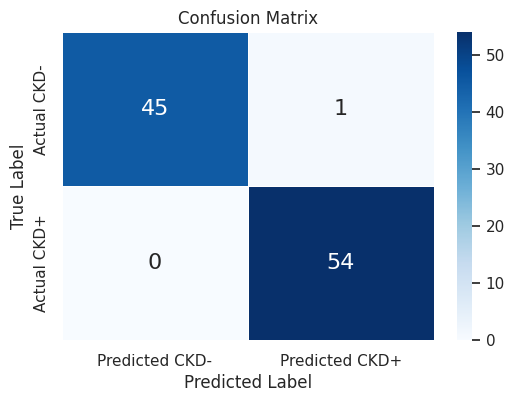

In [68]:
import matplotlib.pyplot as plt
confusion_df = pd.DataFrame(cm, index=['Actual CKD-', 'Actual CKD+'], columns=['Predicted CKD-', 'Predicted CKD+'])
# Plot the colored confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_df, annot=True, cmap='Blues', fmt='d', linewidths=0.5, annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
# Create a table for precision, recall, and accuracy
results_dict = {
    'Model': ['XGB','KNN','Random Forest', 'Decision tree', 'SVM', 'LR', 'Stacked Ensemble'],
    'Precision': [
        precision_score(y_test, xgb_predictions_pca),
        precision_score(y_test, y_test_pred_knn_pca),
        precision_score(y_test, y_test_pred_rf_pca),
        precision_score(y_test, y_test_pred_dt_pca),
        precision_score(y_test, y_test_pred_svm_pca),
        precision_score(y_test, y_test_pred_lr_pca),
        precision_score(y_test, y_test_pred_stacked_model_pca)
    ],
    'Recall': [
        recall_score(y_test,xgb_predictions_pca),
        recall_score(y_test, y_test_pred_knn_pca),
        recall_score(y_test, y_test_pred_rf_pca),
        recall_score(y_test, y_test_pred_dt_pca),
        recall_score(y_test, y_test_pred_svm_pca),
        recall_score(y_test, y_test_pred_lr_pca),
        recall_score(y_test, y_test_pred_stacked_model_pca)
    ],
    'Accuracy': [
        accuracy_score(y_test, xgb_predictions_pca),
        accuracy_score(y_test, y_test_pred_knn_pca),
        accuracy_score(y_test, y_test_pred_rf_pca),
        accuracy_score(y_test, y_test_pred_dt_pca),
        accuracy_score(y_test, y_test_pred_svm_pca),
        accuracy_score(y_test, y_test_pred_lr_pca),
        accuracy_score(y_test, y_test_pred_stacked_model_pca)
    ]
}

results_df = pd.DataFrame(results_dict)

# Display the table
print(results_df)

              Model  Precision    Recall  Accuracy
0               XGB   1.000000  1.000000  1.000000
1               KNN   0.923077  1.000000  0.965517
2     Random Forest   1.000000  1.000000  1.000000
3     Decision tree   0.960000  1.000000  0.982759
4               SVM   0.956522  0.916667  0.948276
5                LR   0.960000  1.000000  0.982759
6  Stacked Ensemble   0.960000  1.000000  0.982759


In [70]:
accuracy_dict = {
    'Knn': {
        'PCA': knn_test_accuracy_pca,
        'No PCA':knn_test_accuracy,
    },
    'SVM': {
        'PCA': svm_rbf_test_accuracy_pca,
        'No PCA':svm_rbf_test_accuracy,
    },
    'DT': {
        'PCA': dt_test_accuracy_pca,
        'No PCA':dt_test_accuracy,
    },
    'RF': {
        'PCA': rf_test_accuracy_pca,
        'No PCA':rf_test_accuracy,
    },
    'LR': {
        'PCA':accuracy_score(y_test,y_test_pred_lr_pca),
        'No PCA': accuracy_score(y_test,y_test_pred_lr),
    },
    'XGB': {
        'PCA': accuracy_score(y_test,xgb_predictions_pca),
        'No PCA':accuracy_score(y_test,predictions),
    },
    'Stacked': {
        'PCA': stack_model_test_accuracy_pca,
        'No PCA':stack_model_test_accuracy,
    }
}


comparison_pca_without_pca = pd.DataFrame(accuracy_dict)
# Display the table
print(comparison_pca_without_pca)

             Knn       SVM        DT   RF        LR  XGB   Stacked
PCA     0.965517  0.948276  0.982759  1.0  0.982759  1.0  0.982759
No PCA  0.948276  0.931034  0.982759  1.0  0.982759  1.0  1.000000


In [71]:
#From above table we can see that the accuracy of some models like KNN,SVM,changed when we used PCA and without PCA and the accuracy of the proposed model also changes.